In [177]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [178]:
intercity = pd.read_csv('./rawdata/intercity_raw.csv')
traffic = pd.read_csv('./rawdata/traffic_raw.csv')
weather = pd.read_csv('./rawdata/weather_raw.csv')

### 1. 도시간 소요시간

In [179]:
intercity.head()

,기준년도,특수일,특송기간,기준시,통행시간(분)
0,2016,연말연시,D,0,325.377667
1,2016,연말연시,D,1,321.183000
2,2016,연말연시,D,2,315.688667
3,2016,연말연시,D,3,309.322000
4,2016,연말연시,D,4,299.949333


In [180]:
intercity['기준년도'].unique()

array([2016, 2017, 2018, 2019, 2020, 2021, 2022], dtype=int64)

In [181]:
intercity.loc[intercity['기준년도']==2016]

,기준년도,특수일,특송기간,기준시,통행시간(분)
0,2016,연말연시,D,0,325.377667
1,2016,연말연시,D,1,321.183000
2,2016,연말연시,D,2,315.688667
3,2016,연말연시,D,3,309.322000
4,2016,연말연시,D,4,299.949333
...,...,...,...,...,...
88,2016,연말연시,D+3,19,262.641000
89,2016,연말연시,D+3,20,259.950000
90,2016,연말연시,D+3,21,262.325000
91,2016,연말연시,D+3,22,265.583000


In [182]:
intercity['특수일'].unique()

array(['연말연시', '추석', '설날'], dtype=object)

In [183]:
intercity.groupby(by='특수일', as_index=False)[['통행시간(분)']].mean()

,특수일,통행시간(분)
0,설날,287.571775
1,연말연시,269.259787
2,추석,305.473260


In [184]:
cs_inter = intercity.loc[(intercity['특수일']=='추석')&(intercity['기준시']==12)]

In [185]:
cs_inter.head()

,기준년도,특수일,특송기간,기준시,통행시간(분)
105,2017,추석,D-3,12,289.827333
129,2017,추석,D-2,12,367.872000
153,2017,추석,D-1,12,430.466667
177,2017,추석,D,12,412.325000
201,2017,추석,D+1,12,392.099500


In [186]:
cs_inter.loc[cs_inter['특송기간']=='D-1']

,기준년도,특수일,특송기간,기준시,통행시간(분)
153,2017,추석,D-1,12,430.466667
582,2018,추석,D-1,12,379.083000
1001,2019,추석,D-1,12,471.191000
1370,2020,추석,D-1,12,316.005333
1788,2021,추석,D-1,12,296.066000


In [187]:
cs_17 = cs_inter.loc[cs_inter['기준년도']==2017]
cs_18 = cs_inter.loc[cs_inter['기준년도']==2018]
cs_19 = cs_inter.loc[cs_inter['기준년도']==2019]
cs_20 = cs_inter.loc[cs_inter['기준년도']==2020]
cs_21 = cs_inter.loc[cs_inter['기준년도']==2021]

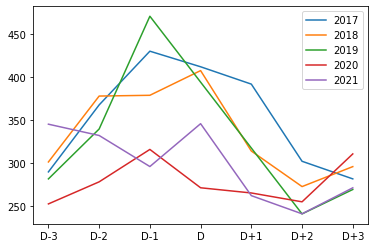

In [188]:
plt.plot('특송기간', '통행시간(분)', data=cs_17, label='2017') # 휴일수: 10일(추석 전 3일, 추석 후 4일)
plt.plot('특송기간', '통행시간(분)', data=cs_18, label='2018') # 휴일수: 5일(추석 전후 1일)
plt.plot('특송기간', '통행시간(분)', data=cs_19, label='2019') # 휴일수: 4일(추석 후 1일)
plt.plot('특송기간', '통행시간(분)', data=cs_20, label='2020') # 휴일수: 5일(추석 후 2일)
plt.plot('특송기간', '통행시간(분)', data=cs_21, label='2021') # 휴일수: 5일(추석 전 2일)

plt.legend()
plt.show()

### 2. 시간대별 교통량

In [189]:
traffic.head()

,기준년도,특수일,특송기간,기준시,교통량(대)
0,2016년,추석,D-2,11,61030
1,2016년,설날,D,19,269059
2,2016년,설날,D-2,14,242951
3,2016년,설날,D-1,14,247527
4,2016년,추석,D,21,63238


In [190]:
cs_traffic = traffic.loc[(traffic['특수일']=='추석')&(traffic['기준시']==12)]

In [191]:
cs_traffic.head()

,기준년도,특수일,특송기간,기준시,교통량(대)
53,2016년,추석,D+1,12,318214
89,2016년,추석,D+2,12,242110
297,2016년,추석,D-3,12,241410
307,2016년,추석,D,12,114162
417,2016년,추석,D+3,12,200366


In [192]:
cs_traffic['기준년도'] = cs_traffic['기준년도'].map({'2016년': 2016,
                                                    '2017년': 2017,
                                                    '2018년': 2018,
                                                    '2019년': 2019,
                                                    '2020년': 2020,
                                                    '2021년': 2021,
                                                    })

In [193]:
cs_traffic['특송기간'] = cs_traffic['특송기간'].map({'D-3': -3,
                                                              'D-2': -2,
                                                              'D-1': -1,
                                                              'D': 0,
                                                              'D+1': 1,
                                                              'D+2': 2,
                                                              'D+3': 3
                                                              })

In [194]:
cs_16 = cs_traffic.loc[cs_traffic['기준년도']==2016].sort_values('특송기간')
cs_17 = cs_traffic.loc[cs_traffic['기준년도']==2017].sort_values('특송기간')
cs_18 = cs_traffic.loc[cs_traffic['기준년도']==2018].sort_values('특송기간')
cs_19 = cs_traffic.loc[cs_traffic['기준년도']==2019].sort_values('특송기간')
cs_20 = cs_traffic.loc[cs_traffic['기준년도']==2020].sort_values('특송기간')
cs_21 = cs_traffic.loc[cs_traffic['기준년도']==2021].sort_values('특송기간')

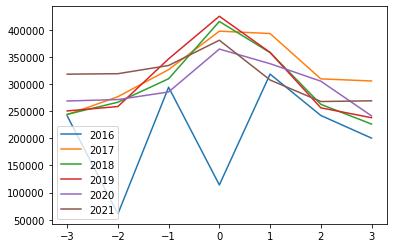

In [195]:
plt.plot('특송기간', '교통량(대)', data=cs_16, label='2016')
plt.plot('특송기간', '교통량(대)', data=cs_17, label='2017') # 휴일수: 10일(추석 전 3일, 추석 후 4일)
plt.plot('특송기간', '교통량(대)', data=cs_18, label='2018') # 휴일수: 5일(추석 전후 1일)
plt.plot('특송기간', '교통량(대)', data=cs_19, label='2019') # 휴일수: 4일(추석 후 1일)
plt.plot('특송기간', '교통량(대)', data=cs_20, label='2020') # 휴일수: 5일(추석 후 2일)
plt.plot('특송기간', '교통량(대)', data=cs_21, label='2021') # 휴일수: 5일(추석 전 2일)

plt.legend()
plt.show()

### 3. 휴게소별 날씨

경부고속도로 휴게소 목록
- 서울만남, 기흥, 안성, 망향, 천안호두, 옥산, 죽암, 옥천, 금강, 황간, 추풍령, 김천, 칠곡, 평사, 건천, 경주, 통도사

In [196]:
weather.head()

,날짜,휴게소명,도로명,일강수값,강수강도값
0,20190912,죽전휴게소,경부선,0.0,0.0
1,20190912,안성휴게소(서울),경부선,0.0,0.0
2,20190912,옥산휴게소(서울),경부선,0.0,0.0
3,20190912,천안(삼)휴게소(서울),경부선,1.1,1.1
4,20190912,죽암휴게소(서울),경부선,6.6,6.6


In [197]:
weather.loc[weather['도로명']=='경부선', '휴게소명'].unique()

array(['죽전휴게소', '안성휴게소(서울)', '옥산휴게소(서울)', '천안(삼)휴게소(서울)', '죽암휴게소(서울)',
       '옥천휴게소(서울)', '황간휴게소(서울)', '입장휴게소(서울)', '추풍령휴게소(서울)', '칠곡휴게소(서울)',
       '경산휴게소(서울)', '건천휴게소(서울)', '언양휴게소(서울)', '신탄진휴게소(서울)', '청원휴게소(서울)',
       '금강휴게소(서울)', '만남의광장', '기흥휴게소', '안성휴게소(부산)', '망향휴게소', '옥산휴게소(부산)',
       '천안휴게소(부산)', '죽암휴게소(부산)', '금강휴게소(부산)', '황간휴게소(부산)', '추풍령휴게소(부산)',
       '평사휴게소(부산)', '칠곡휴게소(부산)', '건천휴게소(부산)', '언양휴게소(부산)', '옥천휴게소(부산)',
       '경주휴게소(부산)'], dtype=object)

In [198]:
cols = ['만남의광장', '기흥휴게소', '안성휴게소(부산)', '망향휴게소', '옥산휴게소(부산)',
       '천안휴게소(부산)', '죽암휴게소(부산)', '금강휴게소(부산)', '황간휴게소(부산)', '추풍령휴게소(부산)',
       '평사휴게소(부산)', '칠곡휴게소(부산)', '건천휴게소(부산)', '언양휴게소(부산)', '옥천휴게소(부산)',
       '경주휴게소(부산)']

In [199]:
weather = weather.loc[weather['휴게소명'].isin(cols)]

In [200]:
weather.head()

,날짜,휴게소명,도로명,일강수값,강수강도값
93,20190912,만남의광장,경부선,0.0,0.0
94,20190912,기흥휴게소,경부선,0.0,0.0
95,20190912,안성휴게소(부산),경부선,1.1,1.1
96,20190912,망향휴게소,경부선,1.1,1.1
97,20190912,옥산휴게소(부산),경부선,0.0,0.0


In [201]:
weather['일강수값'] = np.where(weather['일강수값']<0, 0, weather['일강수값'])
weather['강수강도값'] = np.where(weather['강수강도값']<0, 0, weather['강수강도값'])

In [202]:
weather.groupby('날짜')['일강수값'].sum()

날짜
20190912    20.9
20200930     0.0
20210920     0.0
Name: 일강수값, dtype: float64

In [203]:
weather.loc[weather['날짜']==20190912]

,날짜,휴게소명,도로명,일강수값,강수강도값
93,20190912,만남의광장,경부선,0.0,0.0
94,20190912,기흥휴게소,경부선,0.0,0.0
95,20190912,안성휴게소(부산),경부선,1.1,1.1
96,20190912,망향휴게소,경부선,1.1,1.1
97,20190912,옥산휴게소(부산),경부선,0.0,0.0
98,20190912,천안휴게소(부산),경부선,1.1,1.1
99,20190912,죽암휴게소(부산),경부선,6.6,6.6
100,20190912,금강휴게소(부산),경부선,0.5,0.5
101,20190912,황간휴게소(부산),경부선,1.1,1.1
102,20190912,추풍령휴게소(부산),경부선,1.1,1.1


### 4. 데이터 통합

- 데이터 종류
    - 당일 강수 유무
    - 추석 전 휴일 수
    - 코로나 유무
    - 도시간 소요시간

In [204]:
year = [2018, 2019, 2020, 2021, 2022]
rain = [0, 1, 0, 0, 0]
holiday = [2, 1, 1, 3, 1]
cv19 = [0, 0, 1, 1, 1]

d1_inter = []

for y in year:
    d1_inter.append(cs_inter.loc[(cs_inter['기준년도']==y-1) & (cs_inter['특송기간']=='D-1'), ['통행시간(분)']].values[0][0])

In [205]:
df = pd.DataFrame({'년도': year, 
                   '강수여부': rain, 
                   '추석 전 휴일 수': holiday,
                   '코로나 유무': cv19,
                   '작년 소요시간': d1_inter,
                   })

In [206]:
df

,년도,강수여부,추석 전 휴일 수,코로나 유무,작년 소요시간
0,2018,0,2,0,430.466667
1,2019,1,1,0,379.083000
2,2020,0,1,1,471.191000
3,2021,0,3,1,316.005333
4,2022,0,1,1,296.066000


In [207]:
df['예측 소요시간'] = df['작년 소요시간'].shift(-1)
df = df.drop('작년 소요시간', axis=1)

In [208]:
df.to_csv('./rawdata/final_data.csv', index=False)